In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Crear grafo
G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E']) # Cargar 5 nodos
G.add_edges_from([('D', 'A'), ('A', 'C'), ('D', 'E'), ('B', 'C'), ('A', 'E'), ('D', 'B')]) # Definir conexiones entre nodos

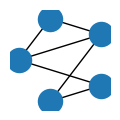

In [3]:
# Dibujar grafo simple
plt.figure(figsize = (1, 1))
nx.draw_shell(G)

In [4]:
# Añadir posiciones 2D, aristas y sus pesos
G.add_nodes_from([('A', {'pos': [3, 3]}),
                  ('B', {'pos': [2, -5]}),
                  ('C', {'pos': [5, 2]}),
                  ('D', {'pos': [-1, 2]}),
                  ('E', {'pos': [4, -5]})])

G.add_edges_from([('D', 'A', {'weight': 1.3}),
                  ('A', 'C', {'weight': 3.9}),
                  ('D', 'E', {'weight': 0.8}),
                  ('B', 'C', {'weight': 0.6}),
                  ('A', 'E', {'weight': 2.2}),
                  ('D', 'B', {'weight': 3.4})])

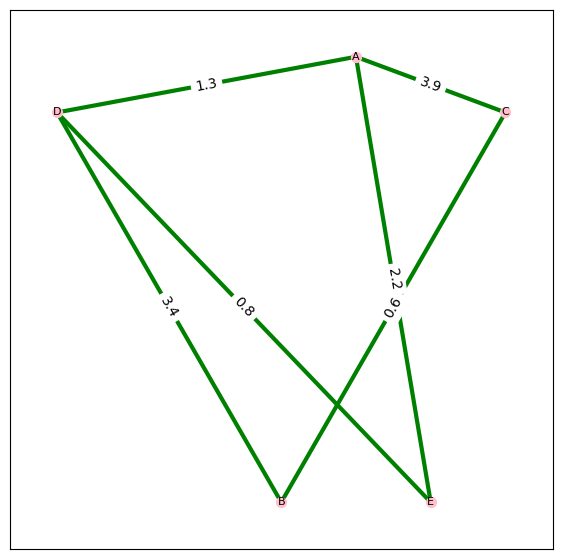

In [5]:
# Grafo 2D con pesos
plt.figure(figsize = (7, 7))
# Añadimos las posiciones a los nodos
positions = nx.get_node_attributes(G, 'pos')
nx.draw_networkx(G, pos = positions, node_size = 50, font_size = 8, width = 3, node_color = 'pink', edge_color = 'green')
# Añadimos el peso a las aristas
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos = positions, edge_labels = weights);

In [6]:
nx.to_pandas_edgelist(G) # Tipo de dato: DataFrame

,source,target,weight
0,A,D,1.3
1,A,C,3.9
2,A,E,2.2
3,B,C,0.6
4,B,D,3.4
5,D,E,0.8


In [7]:
list(G.adjacency())

[('A', {'D': {'weight': 1.3}, 'C': {'weight': 3.9}, 'E': {'weight': 2.2}}),
 ('B', {'C': {'weight': 0.6}, 'D': {'weight': 3.4}}),
 ('C', {'A': {'weight': 3.9}, 'B': {'weight': 0.6}}),
 ('D', {'A': {'weight': 1.3}, 'E': {'weight': 0.8}, 'B': {'weight': 3.4}}),
 ('E', {'D': {'weight': 0.8}, 'A': {'weight': 2.2}})]

In [8]:
# Matriz de adyacencia
adjacency = nx.to_pandas_adjacency(G)
adjacency
# Se genera el archivo y se guarda exactamente en la carpeta donde nos encontramos
adjacency.to_csv('adjacency_ej.csv') 

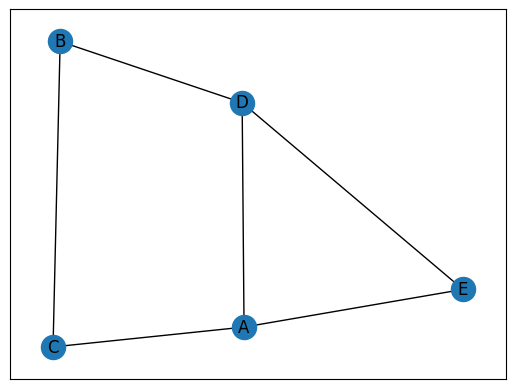

In [9]:
# Leer y reconstruir grafo
df = pd.read_csv('adjacency_ej.csv')
df.set_index('Unnamed: 0', drop = True, inplace = True)
newG = nx.from_pandas_adjacency(df)
nx.draw_networkx(newG)

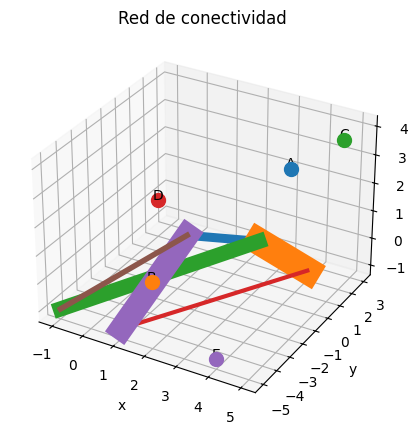

In [10]:
# Grafo 3D

# Crear un DataFrame con coordenadas 3D
coord_df = pd.DataFrame({
    'x': {'A': 3, 'B': 2, 'C': 5, 'D': -1, 'E': 4},
    'y': {'A': 3, 'B': -5, 'C': 2, 'D': 2, 'E': -5},
    'z': {'A': 2, 'B': 1, 'C': 4, 'D': 0, 'E': -1}
})

# Posiciones 3D
pos3D = {n: (coord_df.loc[n, 'x'],
            coord_df.loc[n, 'y'],
            coord_df.loc[n, 'z']) for n in coord_df.index}
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') # El '111' indica la malla de subplots que se van a crear, una de '111' solo será un subplot

# Dibujar nodos
for nodo, (x, y, z) in pos3D.items():
    ax.scatter(x, y, z, s = 100)
    ax.text(x, y, z + 0.03, nodo, fontsize = 10, ha = 'center')

# Dibujar aristas con grosor según peso
for i, j, data in G.edges(data = True):
    x = [pos3D[i][0], pos3D[j][0]]
    y = [pos3D[i][1], pos3D[j][1]]
    x = [pos3D[i][2], pos3D[j][2]]
    ax.plot(x, y, z, linewidth = data['weight']*5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Red de conectividad')
plt.show()